In [1]:
!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import plotly as py
import cufflinks as cf

In [4]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df=pd.read_csv('Eco.csv',index_col=0)
#index_col=0,making the first column index

In [6]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [7]:
df.drop(labels=['Title','Clothing ID'],axis=1,inplace=True)

In [8]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Review Text              22641 non-null  object
 2   Rating                   23486 non-null  int64 
 3   Recommended IND          23486 non-null  int64 
 4   Positive Feedback Count  23486 non-null  int64 
 5   Division Name            23472 non-null  object
 6   Department Name          23472 non-null  object
 7   Class Name               23472 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.6+ MB


In [10]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [11]:
df.dropna(subset=['Review Text','Division Name'],inplace=True)

In [12]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object

In [13]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

REPLACING CONTRACTION OF WORDS WITH EXPANSIONS

In [14]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [15]:
def cont(x):
    if type(x)==str:
        x=x.replace('\\','')
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [16]:
df['Review Text']=df['Review Text'].apply(lambda x:cont(x))

In [17]:
print(' '.join(df['Review Text'].tolist())[:1000])

Absolutely wonderful - silky and sexy and comfortable Love this dress!  it is sooo pretty.  i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt i

In [18]:
from textblob import TextBlob

In [19]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

CREATE NEW COLUMNS:
    POLARITY,,
    REVIEW LENGTH,,
    WORD COUNT,,
    AVERAGE WORD COUNT

In [20]:
df['Polarity']=df['Review Text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [21]:
# not including spaces
df['Review_len']=df['Review Text'].apply(lambda x:(len(x)-x.count(' ')))

In [22]:
df['Word_count']=df['Review Text'].apply(lambda x:len(x.split()))

In [23]:
s='how are you what about you'

In [24]:
df['Average_word_count']=df['Review_len']/df['Word_count']

In [25]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  Polarity  Review_len  Word_count  Average_word_count  
0  Intimates  0.633333          46           8            5.750000  
1    Dresses  0.339583         237          65            3.646154  
2    Dresses  0.073675         403          98            4.112245  
3      Pants  0.550000         103          23            4.478261  
4    Blouses  0.512891         157          36            4.361111

In [26]:
df['Polarity'].iplot(kind='hist',linecolor='black',title='Overall Sentiment Polarity distribution',color='red',bins=40,xTitle='Polarity',yTitle='Frequency')

In [27]:
df['Polarity'].mean()

0.24800509963018202

In [126]:
df['Rating'].iplot(kind='hist',bins=6,linecolor='black',title='Overall Rating distribution')

In [127]:
df['Age'].iplot(kind='hist',bins=50,linecolor='black',title='Overall Age distribution')

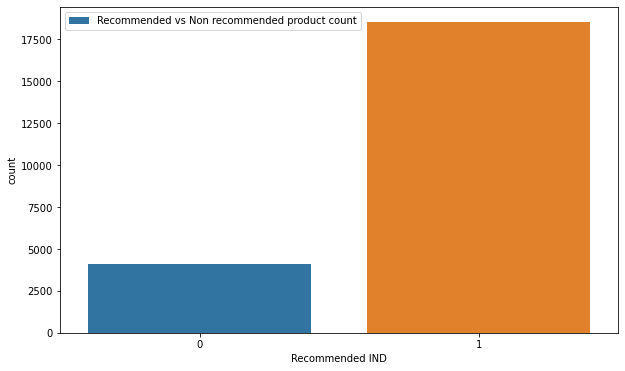

In [137]:
plt.figure(figsize=(10,6))
sns.countplot('Recommended IND',data=df,label='Recommended vs Non recommended product count')
plt.legend()
plt.show()

In [138]:
df['Review_len'].iplot(kind='hist',bins=50,linecolor='black',title='Review Length Distribution')

In [139]:
df['Word_count'].iplot(kind='hist',linecolor='black',title="Word count")

In [140]:
df['Average_word_count'].iplot(kind='hist',linecolor='black',bins=75,title='Average word count')

In [141]:
df['Department Name'].value_counts().iplot(kind='bar',title='Deaprtment data count')

In [142]:
df['Division Name'].value_counts().iplot(kind='bar',title='ivision Name count')

In [143]:
df['Class Name'].value_counts().iplot(kind='bar',title='Class Name count')

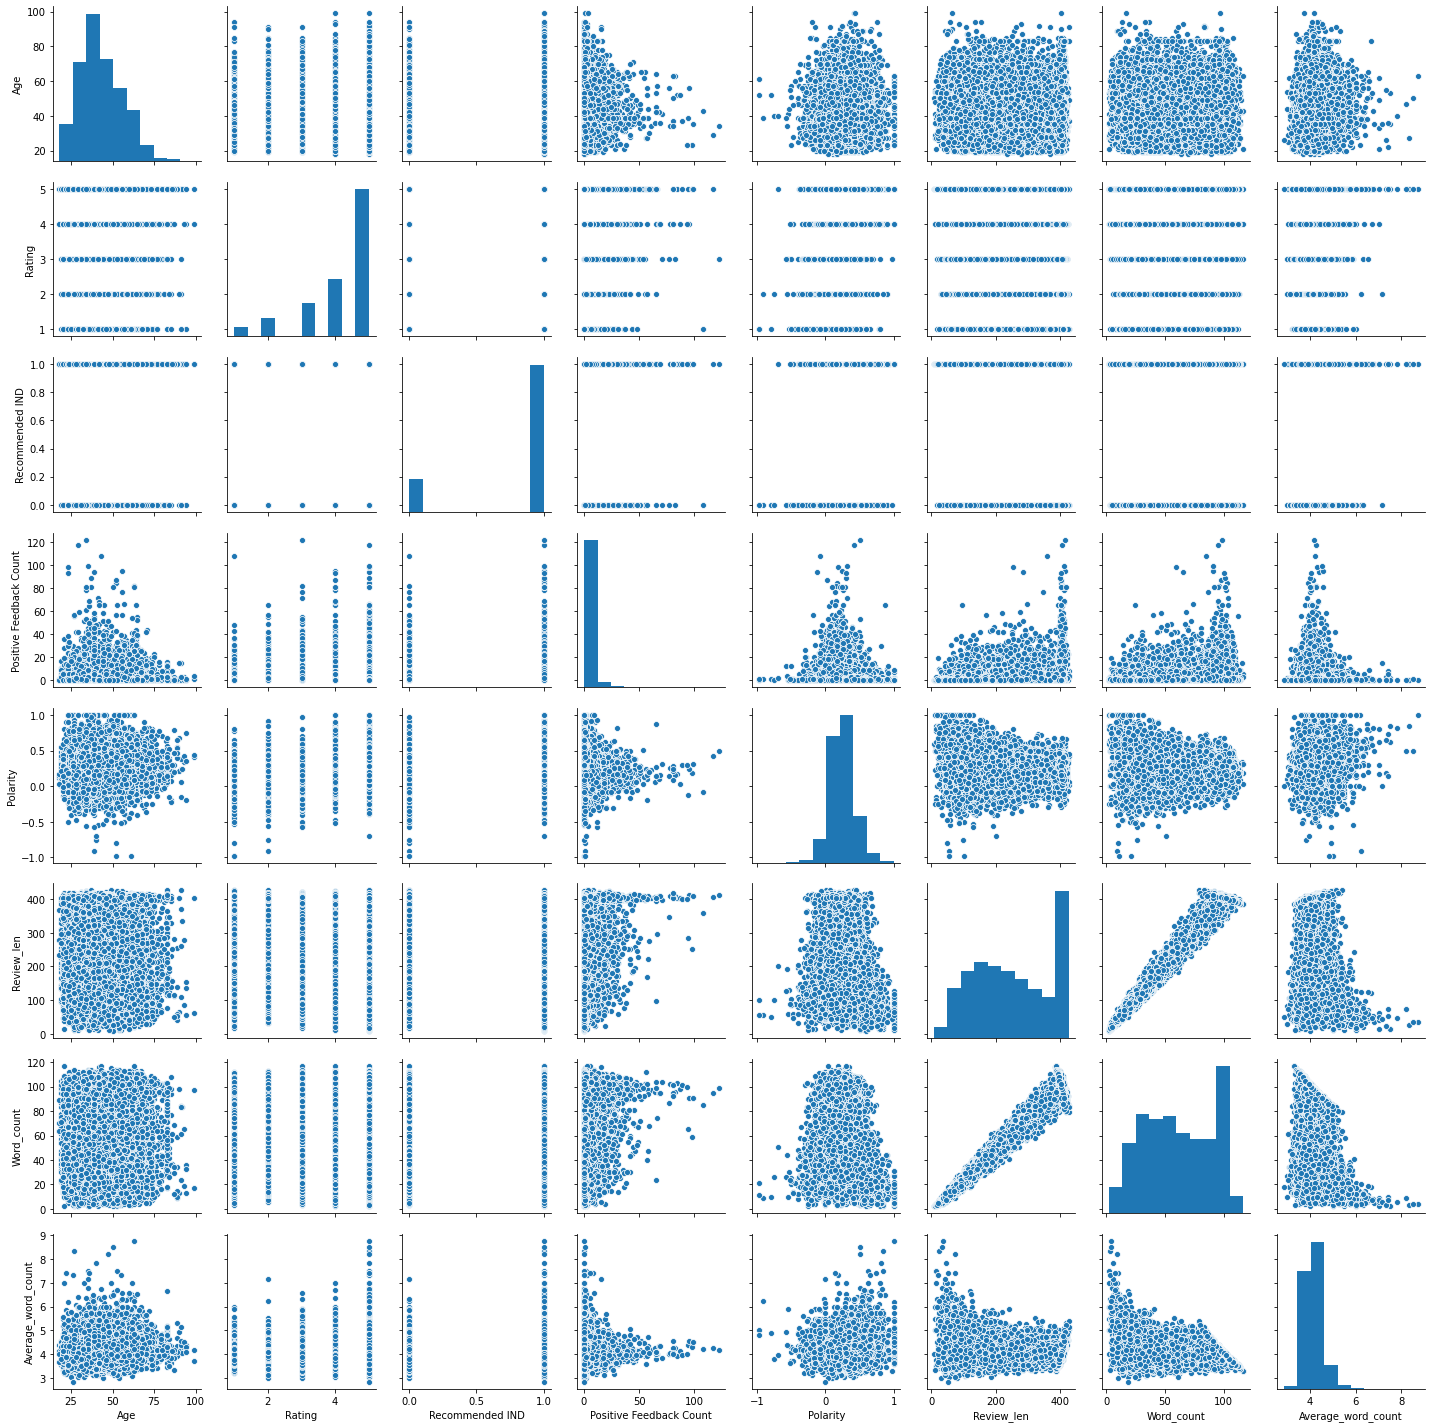

In [39]:
sns.pairplot(data=df)

In [144]:
df['Division Name'].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

In [145]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [146]:
df['Class Name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

In [147]:
df.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Polarity', 'Review_len', 'Word_count',
       'Average_word_count'],
      dtype='object')

DIVISION NAME ANALYSIS

<Figure size 3600x360 with 0 Axes>

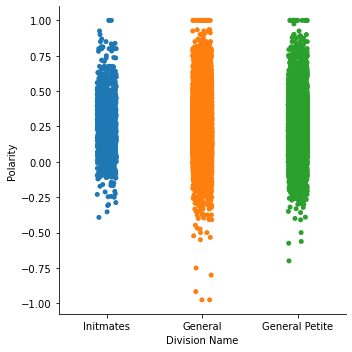

In [154]:
sns.catplot('Division Name','Polarity',data=df)
plt.show()

<Figure size 720x360 with 0 Axes>

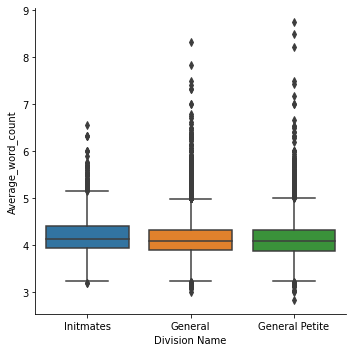

In [152]:
sns.catplot('Division Name','Average_word_count',data=df,kind='box')
plt.show()

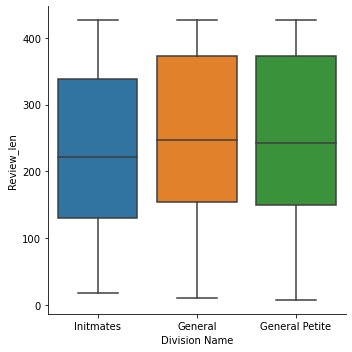

In [155]:
sns.catplot('Division Name','Review_len',data=df,kind='box')
plt.show()

DEPARTMENT NAME ANALYSIS

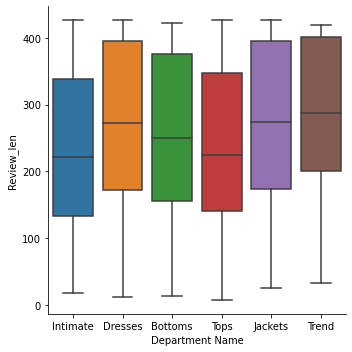

In [156]:
sns.catplot('Department Name','Review_len',data=df,kind='box')
plt.show()

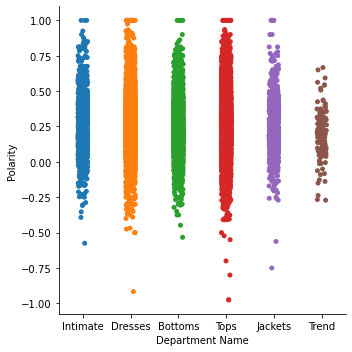

In [157]:
sns.catplot('Department Name','Polarity',data=df)
plt.show()

In [79]:
a1=df[df['Recommended IND']==1][['Recommended IND','Polarity']]
a2=df[df['Recommended IND']==0][['Recommended IND','Polarity']]

In [73]:
a1=a1.astype({'Recommended IND':float})

In [74]:
a1.dtypes

Recommended IND    float64
Polarity           float64
dtype: object

In [78]:
a1.shape

(18527, 2)

In [81]:
a2.shape

(4101, 2)

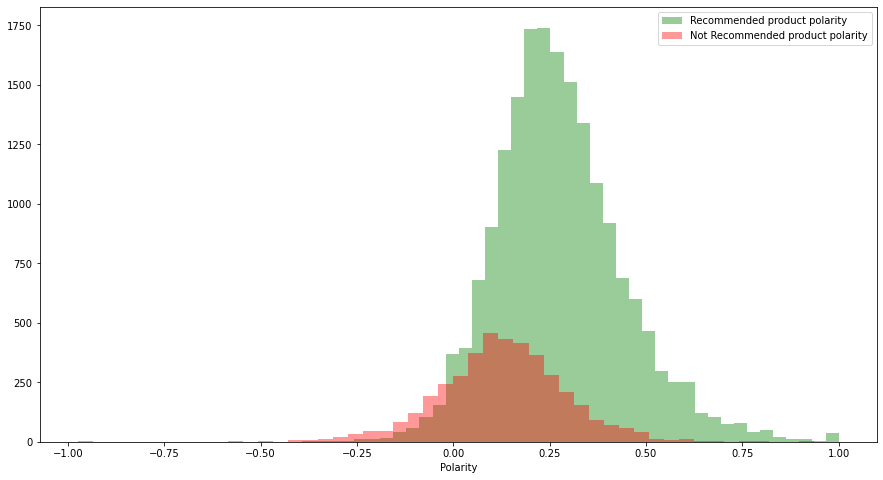

In [104]:
plt.figure(figsize=(15,8))
sns.distplot(a1['Polarity'],hist=True,kde=False,color='g',label='Recommended product polarity')
sns.distplot(a2['Polarity'],color='r',hist=True,kde=False,label='Not Recommended product polarity')
plt.legend()
plt.show()

In [111]:
a3=df[df['Recommended IND']==1][['Recommended IND','Rating']]
a4=df[df['Recommended IND']==0][['Recommended IND','Rating']]

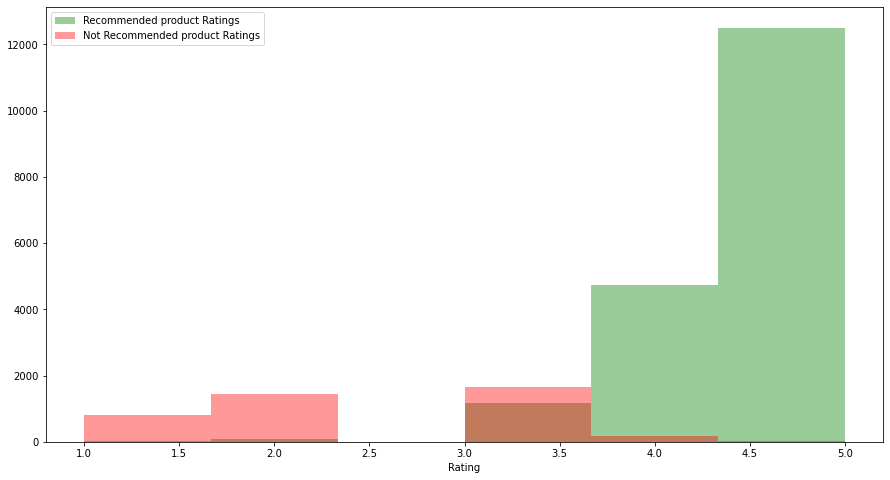

In [120]:
plt.figure(figsize=(15,8))
sns.distplot(a3['Rating'],hist=True,bins=6,kde=False,color='g',label='Recommended product Ratings')
sns.distplot(a4['Rating'],color='r',bins=6,hist=True,kde=False,label='Not Recommended product Ratings')
plt.legend()
plt.show()

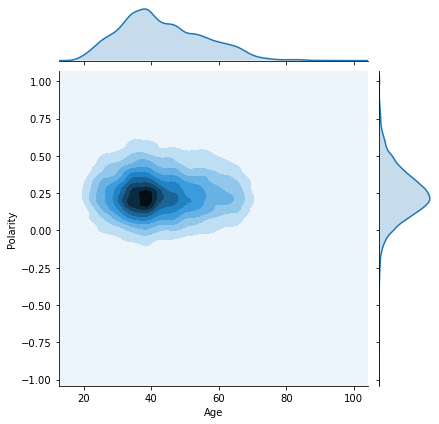

In [187]:
sns.jointplot('Age','Polarity',data=df,kind='kde')
plt.show()

In [158]:
!pip install nltk

In [159]:
import nltk

In [161]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\surface
[nltk_data]     pro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\surface pro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

PARTS OF SPEECH

In [166]:
blob=TextBlob(str(df['Review Text']))

In [169]:
 data=pd.DataFrame(blob.tags,columns=['Text','Tags'])

In [171]:
data.head()

Text Tags
0           0   CD
1  Absolutely   RB
2   wonderful   JJ
3       silky   NN
4         and   CC

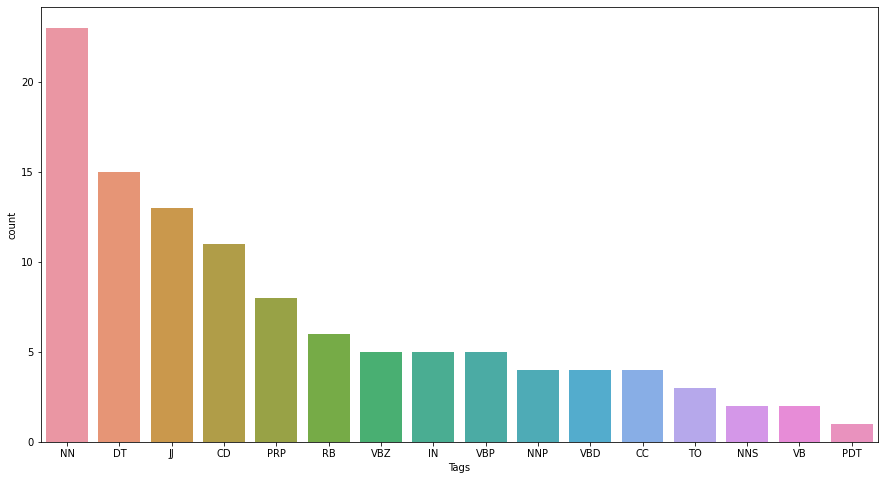

In [178]:
plt.figure(figsize=(15,8))
sns.countplot('Tags',data=data,order=data['Tags'].value_counts().index)